<a href="https://colab.research.google.com/github/Angel-Shaha/YouTube-Comment-Analyser/blob/main/Sentiment_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import re
import matplotlib.pyplot as plt
import tensorflow
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
df= pd.read_csv('/content/SentimentDataset_gh.csv', encoding='unicode_escape')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
port_stem= PorterStemmer()

In [ ]:
def stemming(content):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', content)
  stemmed_content=re.sub('[^a-zA-Z]',' ',cleantext) #^to remove the words which are not letters
  stemmed_content=stemmed_content.lower() #convert all to lowercase
  stemmed_content=stemmed_content.split() #splitting and storing in a list
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #if word does not belong to stem words then process the stemmed content
  stemmed_content=' '.join(stemmed_content) #joining all tweets

  return stemmed_content

In [ ]:
df['stemmed_content']= df['Text'].apply(stemming)

In [ ]:
df.head()

,Text,Label,Sentiment,stemmed_content
0,"Cooking microwave pizzas, yummy",2,positive,cook microwav pizza yummi
1,Any plans of allowing sub tasks to show up in ...,1,neutral,plan allow sub task show widget
2,"I love the humor, I just reworded it. Like sa...",2,positive,love humor reword like say group therapi inste...
3,naw idk what ur talkin about,1,neutral,naw idk ur talkin
4,That sucks to hear. I hate days like that,0,negative,suck hear hate day like


In [ ]:
X = df['stemmed_content']
Y = df['Label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
vectorizer=TfidfVectorizer()
X_train_data = vectorizer.fit_transform(X_train)
X_test_data=vectorizer.transform(X_test)
X_train.shape

(29146,)

In [ ]:
Y_train.shape

(29146,)

In [ ]:
Y_train.head()

27373    2
23919    2
8867     1
24643    0
20119    1
Name: Label, dtype: int64

## **NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_data, Y_train, test_size=0.33,random_state = 15)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model1_nb = MultinomialNB()
y_train_pred = model1_nb.fit(X1_train, y1_train).predict(X1_train)
y_pred = model1_nb.predict(X1_test)

print("Multinomial Naive Bayes model train accuracy (in %):", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy (in %):", metrics.accuracy_score(y1_test, y_pred)*100)

Multinomial Naive Bayes model train accuracy (in %): 77.87166487427665
Multinomial Naive Bayes model test accuracy (in %): 60.51564611705999


In [ ]:
precision = precision_score(y1_test, y_pred, average='weighted')
recall = recall_score(y1_test, y_pred, average='weighted')
f1 = f1_score(y1_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.624003087770518
Recall: 0.6051564611705998
F1 Score: 0.6032058875378707


In [ ]:
# Predict the labels
y_pred_train = model1_nb.predict(X1_train)
y_pred_test = model1_nb.predict(X1_test)

In [ ]:
print(classification_report(y1_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55      2815
           1       0.52      0.68      0.59      3598
           2       0.67      0.66      0.67      3206

    accuracy                           0.61      9619
   macro avg       0.63      0.60      0.60      9619
weighted avg       0.62      0.61      0.60      9619



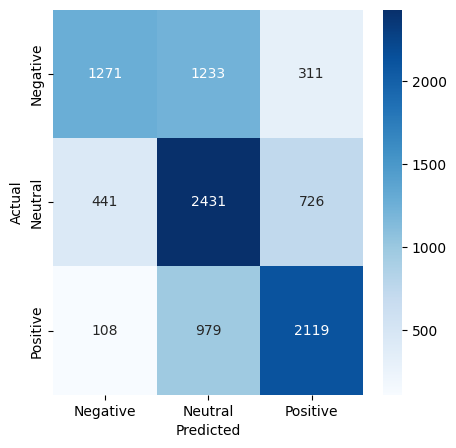

In [ ]:
cm = confusion_matrix(y1_test, y_pred_test)

import seaborn as sn
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gboost_m = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
train_pred = gboost_m.fit(X1_train,y1_train).predict(X1_train)
prediction = gboost_m.score(X1_test,y1_test )
print("Gradient Boosting model train accuracy( in % ): ",accuracy_score(y1_train, train_pred)*100 )
print("Gradient Boosting model test accuracy( in % ): ", prediction*100)

Gradient Boosting model train accuracy( in % ):  69.03262149843806
Gradient Boosting model test accuracy( in % ):  64.549329452126


In [ ]:
# Predict on the test set
y_pred_gb = gboost_m.predict(X1_test)

# Calculate precision, recall, and F1 score
precision_gb = precision_score(y1_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y1_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y1_test, y_pred_gb, average='weighted')

# Print the scores
print("Precision (Gradient Boosting):", precision_gb)
print("Recall (Gradient Boosting):", recall_gb)
print("F1 Score (Gradient Boosting):", f1_gb)

Precision (Gradient Boosting): 0.6626082885589245
Recall (Gradient Boosting): 0.64549329452126
F1 Score (Gradient Boosting): 0.6448838949201197


In [ ]:
# Predict the labels
train_pred = gboost_m.predict(X1_train)
test_pred = gboost_m.predict(X1_test)

In [ ]:
print(classification_report(y1_test, test_pred))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59      2815
           1       0.56      0.73      0.63      3598
           2       0.74      0.67      0.70      3206

    accuracy                           0.65      9619
   macro avg       0.67      0.64      0.64      9619
weighted avg       0.66      0.65      0.64      9619



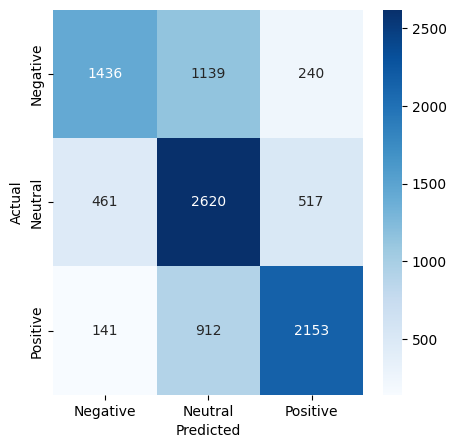

In [ ]:
cm = confusion_matrix(y1_test, test_pred)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
train_pred = rf_model.fit(X1_train,y1_train).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  99.52373636503303
random Forest model test accuracy( in % ):  65.98399001975257


In [ ]:
rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)
train_pred = rf_model.fit(X1_train,y1_train).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  70.12341885594306
random Forest model test accuracy( in % ):  65.44339328412518


In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X1_test)

# Calculate precision, recall, and F1 score
precision_rf = precision_score(y1_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y1_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y1_test, y_pred_rf, average='weighted')

# Print the scores
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_rf)

Precision (Random Forest): 0.6657339227088213
Recall (Random Forest): 0.6544339328412517
F1 Score (Random Forest): 0.6524425299548279


In [ ]:
# Predict the labels
test_pred = rf_model.predict(X1_test)
prediction = rf_model.score(X1_test, y1_test)

In [ ]:
print(classification_report(y1_test, test_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61      2815
           1       0.58      0.69      0.63      3598
           2       0.70      0.74      0.72      3206

    accuracy                           0.65      9619
   macro avg       0.67      0.65      0.65      9619
weighted avg       0.67      0.65      0.65      9619



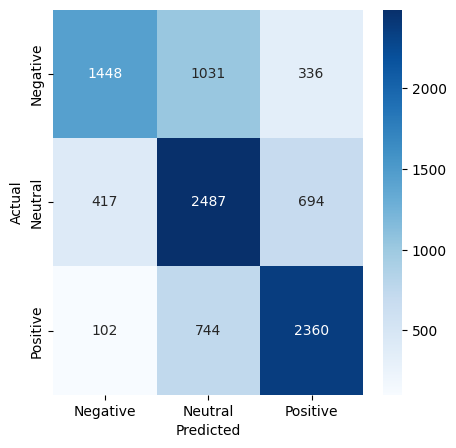

In [ ]:
cm = confusion_matrix(y1_test, test_pred)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **SVM**

In [ ]:
model_svm=svm.SVC(C=1, kernel='linear')
model_svm.fit(X1_train,y1_train)

SVC(C=1, kernel='linear')

In [ ]:
#accuracy score on training data
X_train_prediction=model_svm.predict(X1_train)
training_data_accuracy=accuracy_score(X_train_prediction,y1_train)
print('Train accuracy score= ',training_data_accuracy)
#accuracy score on test data
X_test_prediction=model_svm.predict(X1_test)
test_data_accuracy=accuracy_score(X_test_prediction,y1_test)
print('Test accuracy score= ',test_data_accuracy)

Train accuracy score=  0.8142571823628821
Test accuracy score=  0.6577606819835742


In [ ]:
# Calculate precision, recall, and F1 score
precision_svm = precision_score(y1_test, X_test_prediction, average='weighted')
recall_svm = recall_score(y1_test, X_test_prediction, average='weighted')
f1_svm = f1_score(y1_test, X_test_prediction, average='weighted')

# Print the scores
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)

Precision (SVM): 0.6676623990743705
Recall (SVM): 0.6577606819835742
F1 Score (SVM): 0.6591358855755087


In [ ]:
print(classification_report(y1_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62      2815
           1       0.58      0.69      0.63      3598
           2       0.76      0.69      0.72      3206

    accuracy                           0.66      9619
   macro avg       0.67      0.65      0.66      9619
weighted avg       0.67      0.66      0.66      9619



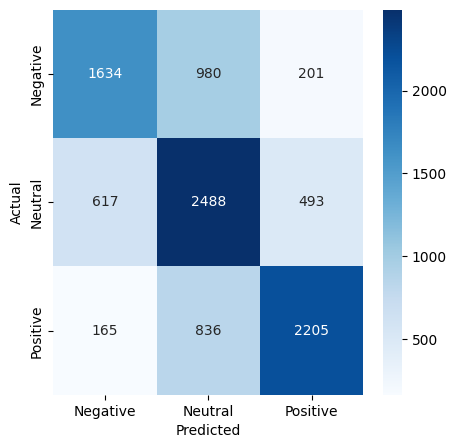

In [ ]:
cm = confusion_matrix(y1_test, X_test_prediction)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **COMPARISON OF THE FOUR**

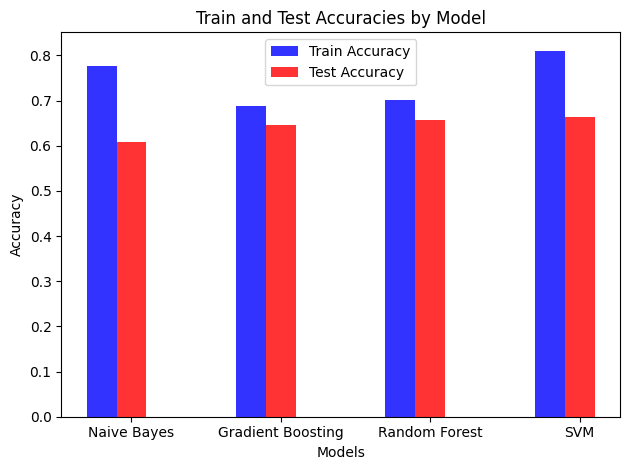

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# Define models
models = [
    MultinomialNB(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
    RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=8),
    svm.SVC(C=1, kernel='linear')
]

# Train and evaluate models
train_accuracies = []
test_accuracies = []
for model in models:
    train_pred = model.fit(X1_train, y1_train).predict(X1_train)
    test_pred = model.predict(X1_test)
    train_accuracy = accuracy_score(y1_train, train_pred)
    test_accuracy = accuracy_score(y1_test, test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot histogram
fig, ax = plt.subplots()
index = np.arange(len(models))
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, train_accuracies, bar_width, alpha=opacity, color='b', label='Train Accuracy')
rects2 = plt.bar(index + bar_width, test_accuracies, bar_width, alpha=opacity, color='r', label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies by Model')
plt.xticks(index + bar_width, ('Naive Bayes', 'Gradient Boosting', 'Random Forest', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()